# Lab 1

Author: Justin Ventura [[jventura3@gulls.salisbury.edu]]

Date: Thursday, September 3rd, 2020.

## - Description -

Introductory lab going over very simple concepts for review.

### First make a list of 10 musicians (dictionaries):

In [1]:
artists = [
    {'id': 0, 'name': 'Juice WRLD'},
    {'id': 1, 'name': 'XXXTentacion'},
    {'id': 2, 'name': '21 Savage'},
    {'id': 3, 'name': 'Lil Baby'},
    {'id': 4, 'name': 'The Kid Laroi'},
    {'id': 5, 'name': 'Rich Brian'},
    {'id': 6, 'name': 'Trippie Redd'},
    {'id': 7, 'name': 'Gunna'},
    {'id': 8, 'name': 'Travis Scott'},
    {'id': 9, 'name': 'Rich The Kid'},
    {'id': 10, 'name': 'Iann Dior'},
]

### Now a list of songs:

In [2]:
songs = [
    {'id': 0, 'name': 'Robbery'},
    {'id': 1, 'name': 'Bankroll'},
    {'id': 2, 'name': 'Drip Too Hard'},
    {'id': 3, 'name': 'Go'},
    {'id': 4, 'name': 'F*** Love'},
    {'id': 5, 'name': 'We Should'},
    {'id': 6, 'name': 'Prospect'},
    {'id': 7, 'name': 'Dark Knight Dummo'},
    {'id': 8, 'name': 'Blast Off'},
    {'id': 9, 'name': 'Changes'},
    {'id': 10, 'name': 'Plug Walk'},
    {'id': 11, 'name': 'Strings'},
    {'id': 12, 'name': 'Yosemite'},
    {'id': 13, 'name': 'Stay For A While'},
    {'id': 14, 'name': 'All My Friends'},
    {'id': 15, 'name': 'Cant Leave Without It'}
]

### Now here are the pairs of (artist id, song id) relationships:

In [3]:
# form (artist, song)
artist_songs = [
    (0,0), (0,3), (0,8),
    (1,4), (1,9),
    (2,14), (2,15),
    (3,2), (3,5), (3,6), (3,15),
    (4,3),
    (5,1),
    (6,4), (6,7), (6,8),
    (7,2), (7,11), (7,12), (7,15),
    (8,7),
    (9,1), (9,10), 
    (10,6), (10,11), (10,13),
]

### Now we can make a subroutine <code> who_covered </code> to return a list of artists who worked on the song passed in as an argument.

In [4]:
def who_covered(target_song: str) -> list:
    target = next(song['id'] for song in songs if song['name'] == target_song)
    return [artists[pair[0]]['name'] for pair in artist_songs if pair[1] is target]

print(who_covered('F*** Love')) # Should print XXXTentacion and Trippie Redd

['XXXTentacion', 'Trippie Redd']


### Now we can make a subroutine <code> shared_songs </code> to take in an artists name, then return songs they have which are also shared with other artists.

In [5]:
def shared_songs(target_artist: str) -> list:
    target = next(artist['id'] for artist in artists if artist['name'] == target_artist)
    to_compare = [pair[1] for pair in artist_songs if pair[0] is target]

    return [songs[pair[1]].get('name') for pair in artist_songs if songs[pair[1]].get('id') in                   to_compare and songs[pair[0]].get('id') != target]

print(shared_songs('Juice WRLD')) # Should print: 'Go' and 'Blast Off'

['Go', 'Blast Off']


### Now we can make a subroutine <code> song_popularity </code> that prints - in order from most to least covers – the name and number of times each song has been covered.

In [6]:
def song_popularity():
    ranks = {}
    for i in range(len(songs)):
        ranks[songs[i]['name']] = 0
    
    for pair in artist_songs:
        ranks[songs[pair[1]].get('name')] += 1

    ranks = {name: cnt for name, cnt in sorted(ranks.items(),key=lambda item: item[1],reverse=True)}
    
    print('Song name -->  # of covers  ', end='\n------------------------\n')
    for name, cnt in ranks.items():
        print(name, cnt, sep=' --> ')

song_popularity()

Song name -->  # of covers  
------------------------
Cant Leave Without It --> 3
Bankroll --> 2
Drip Too Hard --> 2
Go --> 2
F*** Love --> 2
Prospect --> 2
Dark Knight Dummo --> 2
Blast Off --> 2
Strings --> 2
Robbery --> 1
We Should --> 1
Changes --> 1
Plug Walk --> 1
Yosemite --> 1
Stay For A While --> 1
All My Friends --> 1


### The following code will include data about each individual artist; keywords that describe their music.

In [7]:
keywords = [
    (0, 'sad'), (0, 'rnb'), (0, 'melodic'), (0, 'piano'),
    (1, 'sad'), (1, 'punk rock'), (1, 'acoustic'), (1, 'guitar'), (1, 'piano'),
    (2, 'trap'), (2,'dark'),
    (3, 'trap'), (3, 'piano'), (3, 'melodic'),
    (4, 'sad'), (4, 'rnb'), (4, 'melodic'), (4, 'pop'),
    (5, 'pop'), (5, 'acoustic'), (5, 'piano'),
    (6, 'sad'), (6, 'rnb'),
    (7, 'trap'), (7, 'guitar'),
    (8, 'trap'), (8, 'dark'),
    (9, 'trap'), (9, 'tenor'),
    (10, 'sad'), (10, 'rnb'), (10, 'melodic'), (10, 'pop'), (10, 'acoustic'), (10, 'guitar'),
]

### Now we will write a function which, given an artist, will return a list of the top 3 similar artists.

In [8]:
from collections import defaultdict

def similar_artists(target_artist: str) -> list:
    target_id = next(artist['id'] for artist in artists if artist['name'] == target_artist)

    grouping = defaultdict(list)
    for id, keyword in keywords:
        grouping[id].append(keyword)

    target = (target_id, grouping[target_id])
    grouping.pop(target_id, None)

    scores = {key: {key: 0} for key, val in grouping.items()}

    for id, tags in grouping.items():
        for tag in tags:
            if tag in target[1]:
                scores[id][id] += 1

    fresh = [dic for _, dic in scores.items()]

    new = []
    for elem in fresh:
        new += (elem.items())

    new.sort(key=lambda item: item[1], reverse=True)
    while len(new) > 3:
        new.pop(-1)

    return [artists[id]['name'] for id, score in new]

print(similar_artists('The Kid Laroi')) # Should print Iann Dior, Juice WRLD, Trippie Redd

['Iann Dior', 'Juice WRLD', 'Trippie Redd']


### How can we visualize the “type” of each song? What styles and what types of artists tend to play each song?

Well, to visualize each song, one great option could be to use a radar chart.  This is useful because the radar could have every keyword in the database be a variable on the chart, then take each artist who worked on the song, take their kewords, and add each keyword to its respective axis on the chart. The flaw with this, however, is that the more keywords in the database, the harder it becomes to read the data.  So this would be best to use with limited keywords (in this specific example, there are a reasonable amount of keywords to create a readable radar chart).  If the number of possible keywords  was arbitrarily large for a song with an arbitrarily large and a uniformly distributed pool of artists, we could consider using a bar chart.  This way, you could consider each 'bucket' to be a space for a keyword, then the greater the y-value (height) the bar in the bucket (discrete x-point), the more that keyword is associated with the song in question.  In both of these cases, we could implement some sort of database with specific 'types' of songs, which then are assigned a specific shape of radar chart/histogram.  Then each visualization could be compared against the predetermined 'types.'  Then if there is no exact match, calculate the error against each type, and whichever has minimal error could be a likely candidate to give it a type.  You could also come up with a machine learning algorithm that, very generally (since I am still very new to machine learning at this time), could be trained to learn types of songs and their respective graphs.  Then test it on songs which it has never 'seen' before to access its accuracy.

### For a specific example, what visualization can answer the question: What style of song is “Simple Twist of Fate”? Does it have a style or does it “defy genre”?

Any of the previously mentioned could be used for this.  Which one is the best and most readable?  I don't know yet, however after more experience with problems like this, I think I would be able to give a good answer to that question in due time.  

### Final questions:

- (a) Sketch by hand or digitally an example of your idea, using the data you entered above.


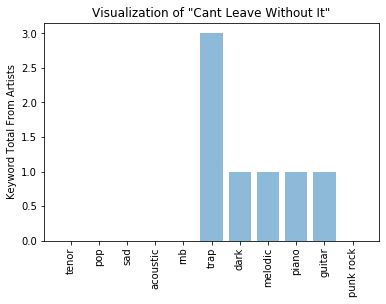

In [9]:
import matplotlib.pyplot as plt
import numpy as np

all_keywords = list(set([keyword for _, keyword in keywords]))
x_vals = [0 for keyword in all_keywords]
y_pos = np.arange(len(all_keywords))

sample = who_covered('Cant Leave Without It')
ids = [artist['id'] for artist in artists if artist['name'] in sample]
bucket_tags = [keyword[1] for keyword in keywords if keyword[0] in ids]

for tag in bucket_tags:
    for i in range(len(all_keywords)):
        if tag == all_keywords[i]:
            x_vals[i] += 1

plt.bar(y_pos, x_vals, align='center', alpha=0.5)
plt.xticks(y_pos, all_keywords, rotation='vertical')
plt.ylabel('Keyword Total From Artists')
plt.title('Visualization of "Cant Leave Without It"')
plt.show()


### (b) Investigate how you might get Python to automate the production of your idea. What libraries can you find that might be useful?

As seen above, I used 'matplotlib.pyplot'.  There are some other libraries such as pandas, numpy, keras, sci-kit, etc.  

### (c) Finally, write down one strategy to try answering the above questions about song-style quantitatively. Why? If you’re, say, Spotify, then you would probably like a way to appease a user who says: “I like classic rock that uses lots of keyboard and slow rythm”!

The previous markdown cell gave my quantitative approach to this problem.  To further that discussion,another idea could be to introduce weights to keywords, depending on how discriptive the keyword is.  For example, the keyword 'pop' could be a little more descriptive than 'piano', since one defines a genre with the latter is simply one of the instruments involved.  In the above spotify user statement,'classic rock' is the main genre which the user is looking for, then 'keyboard' and 'slow rythm' are elements which belong in any genre, but of course could be used to narrow down once the main genre is decided by the algorithm.